*Source:* https://adataanalyst.com/scikit-learn/linear-classification-method/

In [4]:
%matplotlib inline

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

print (X_iris.shape, y_iris.shape)
print( X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [45]:
import pandas as pd

df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_iris[:,:2], y_iris

# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=33)

print (X_train.shape, y_train.shape)

# Standarize the features
# Feature Scaling
#  For each feature, calculate the average, subtract the mean
#  value from the feature value, and divide the result by their standard deviation. After
#  scaling, each feature will have a zero average, with a standard deviation of one.
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(112, 2) (112,)


In [48]:
X_train

array([[-0.91090798, -1.59761476],
       [-1.0271058 ,  0.09442168],
       [ 0.59966379, -1.59761476],
       [ 0.01867465, -0.9631011 ],
       [ 0.48346596, -0.32858743],
       [-1.25950146,  0.30592623],
       [-1.37569929,  0.72893534],
       [-0.79471015, -1.17460565],
       [-1.14330363,  0.72893534],
       [ 2.45882905,  1.57495356],
       [-0.79471015,  0.72893534],
       [-0.79471015,  1.36344901],
       [-0.21372101, -0.32858743],
       [ 0.83205945, -0.11708288],
       [-0.44611666,  1.78645812],
       [ 1.41304859,  0.30592623],
       [ 0.01867465, -0.54009199],
       [ 2.22643339, -0.9631011 ],
       [-0.32991883, -1.17460565],
       [ 0.13487248,  0.30592623],
       [-1.0271058 ,  0.09442168],
       [-1.49189712, -1.59761476],
       [ 0.59966379, -0.54009199],
       [-1.60809495, -0.32858743],
       [-0.91090798,  1.15194445],
       [ 1.64544425, -0.11708288],
       [ 0.25107031,  0.72893534],
       [ 0.48346596, -1.80911932],
       [ 1.8778399 ,

Text(0,0.5,'Sepal width')

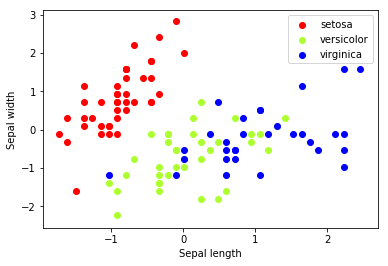

In [8]:
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    px = X_train[:, 0][y_train == i]
    py = X_train[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [9]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()

# fit (train) the classifier
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [10]:
# print learned coeficients
print (clf.coef_)
print (clf.intercept_)

[[-26.32632003  10.99870201]
 [  9.68936349 -16.28001707]
 [ 11.1800348    1.35666809]]
[-18.9050818   -2.0865416   -4.57421222]


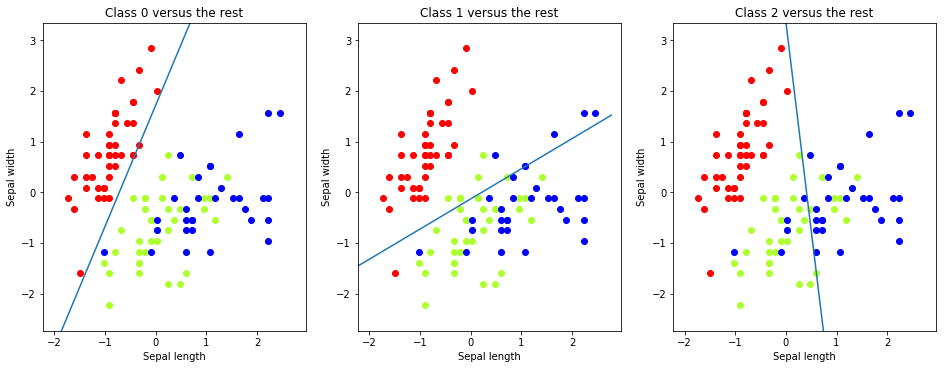

In [18]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(16,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    for j in range(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys)